**Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.**

Saving house_prices.csv to house_prices (3).csv
First few rows of the dataset:
   SquareFootage  Bedrooms  Bathrooms   Price
0           1500         3        2.0  300000
1           2500         4        3.0  450000
2           1200         2        1.0  200000
3           1800         3        2.0  350000
4           2200         4        2.5  400000

Checking for missing values:
SquareFootage    0
Bedrooms         0
Bathrooms        0
Price            0
dtype: int64

Dataframe after dropping missing values:
   SquareFootage  Bedrooms  Bathrooms   Price
0           1500         3        2.0  300000
1           2500         4        3.0  450000
2           1200         2        1.0  200000
3           1800         3        2.0  350000
4           2200         4        2.5  400000

Mean Squared Error: 136529391.21337953
R^2 Score: 0.9146691304916378

Predicted Price for a house with 2500 sqft, 4 bedrooms, and 3 bathrooms: $466308.41


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


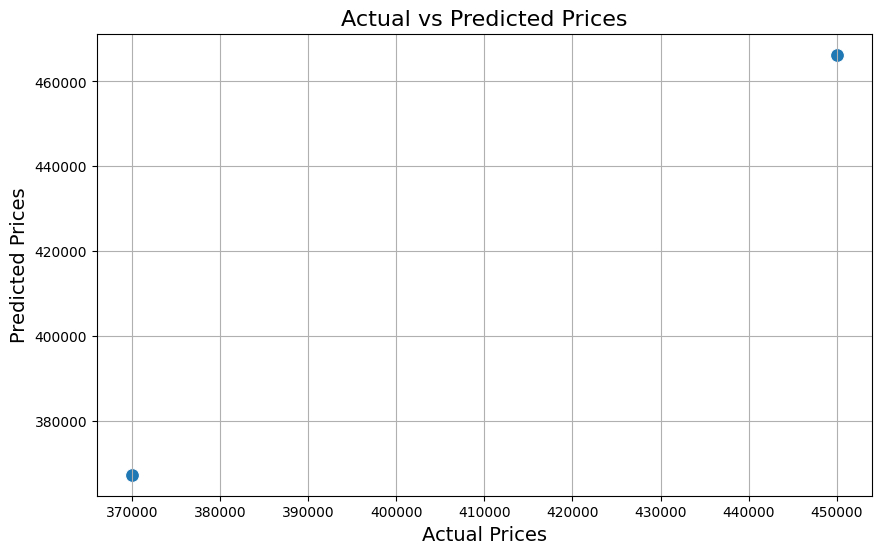

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
from google.colab import files
uploaded = files.upload()

# Read the uploaded CSV file
df = pd.read_csv(list(uploaded.keys())[0])

# Display the first few rows of the dataframe
print("First few rows of the dataset:")
print(df.head())

# Check for missing values
print("\nChecking for missing values:")
print(df.isnull().sum())

# Drop rows with missing values
df = df.dropna()

# Display the dataframe after dropping missing values
print("\nDataframe after dropping missing values:")
print(df.head())

# Define the features (independent variables) and the target (dependent variable)
X = df[['SquareFootage', 'Bedrooms', 'Bathrooms']]
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)

print(f'\nMean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Predict the price of a new house
new_house = np.array([[2500, 4, 3]])  # Example: 2500 sqft, 4 bedrooms, 3 bathrooms
predicted_price = model.predict(new_house)

print(f'\nPredicted Price for a house with 2500 sqft, 4 bedrooms, and 3 bathrooms: ${predicted_price[0]:.2f}')

# Plotting actual vs predicted prices
plt.figure(figsize=(10, 6), dpi=100)
sns.scatterplot(x=y_test, y=y_pred, marker='o', s=100, edgecolor='w')
plt.xlabel('Actual Prices', fontsize=14)
plt.ylabel('Predicted Prices', fontsize=14)
plt.title('Actual vs Predicted Prices', fontsize=16)
plt.grid(True)
plt.show()
